In [1]:
# using the TextBlob object from nltk library for Natural Language processing purposes
# testing this tool
# %matplotlib inline
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
text = 'Today is a beautiful day. Tomorrow looks like bad weather.'
blob = TextBlob(text)
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [2]:
# all the sentences
blob.sentences

[Sentence("Today is a beautiful day."),
 Sentence("Tomorrow looks like bad weather.")]

In [3]:
# all the words in the text blop
blob.words

WordList(['Today', 'is', 'a', 'beautiful', 'day', 'Tomorrow', 'looks', 'like', 'bad', 'weather'])

In [4]:
# part of speech tagging
blob.tags

[('Today', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('day', 'NN'),
 ('Tomorrow', 'NNP'),
 ('looks', 'VBZ'),
 ('like', 'IN'),
 ('bad', 'JJ'),
 ('weather', 'NN')]

In [5]:
# noun phrases
blob.noun_phrases

WordList(['beautiful day', 'tomorrow', 'bad weather'])

In [6]:
# sentiment analysis
blob.sentiment

Sentiment(polarity=0.07500000000000007, subjectivity=0.8333333333333333)

In [7]:
%precision 3

'%.3f'

In [8]:
blob.sentiment.polarity

0.075

In [9]:
blob.sentiment.subjectivity

0.833

In [10]:
# sentiment from individual sentences


# polarity
# ============
# -1.0 negative
# 1.0 positive
# 0.0 neutral


# subjectivity
# ============
# 0.0 objective
# 1.0 subjective
for sentence in blob.sentences:
    print(sentence)
    print(sentence.sentiment)
    print()


Today is a beautiful day.
Sentiment(polarity=0.85, subjectivity=1.0)

Tomorrow looks like bad weather.
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)



In [11]:
# naive Bayes Analyzer usage
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [12]:
blob.sentiment

Sentiment(classification='neg', p_pos=0.47662917962091056, p_neg=0.5233708203790892)

In [13]:
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(classification='pos', p_pos=0.8117563121751951, p_neg=0.18824368782480477)
Sentiment(classification='neg', p_pos=0.174363226578349, p_neg=0.8256367734216521)


In [14]:
# Google translate and google language detection
# with textblob
blob.detect_language()

'en'

In [15]:
# translate to spanish
spanish = blob.translate(to='es')
spanish

TextBlob("Hoy es un hermoso dia. Mañana parece mal tiempo.")

In [16]:
spanish.detect_language()

'es'

In [17]:
chinese = blob.translate(to='zh')
chinese

TextBlob("今天是美好的一天。明天看起来像恶劣的天气。")

In [18]:
chinese.detect_language()

'zh-CN'

In [19]:
# just calling the translate function defaults into english
spanish.translate()

TextBlob("Today is a beautiful day. Tomorrow seems bad weather.")

In [20]:
chinese.translate()

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [21]:
# pluralizing and singularizing
from textblob import Word

index = Word('index')

index.pluralize()

'indices'

In [22]:
cacti = Word('cacti')
cacti.singularize()

'cactus'

In [23]:
# plurilizing sentences
animals = TextBlob("dog cat fish bird").words
animals.pluralize()

WordList(['dogs', 'cats', 'fish', 'birds'])

In [24]:
# SPELL CHECKING
word = Word('theyr')
%precision 2

'%.2f'

In [25]:
word.spellcheck()

[('they', 0.57), ('their', 0.43)]

In [26]:
# highest confidence value for correctness in spelling
word.correct()

'they'

In [27]:
# spelling in sentences

# this one might be extremely useful
# do not forget about this one
sentence = TextBlob("Ths sentence has missplled wrds.")

sentence.correct()

TextBlob("The sentence has misspelled words.")

In [28]:
# NORMALIZATION: STEMMING AND LEMMATIZATION
word = Word('varieties')
word.stem()

'varieti'

In [29]:
word.lemmatize()

'variety'

In [30]:
# WORD FREQUENCIES
from pathlib import Path
blob = TextBlob(Path("RomeoAndJuliet.txt").read_text())
blob.word_counts['juliet']

195

In [31]:
blob.word_counts['romeo']

320

In [32]:
blob.word_counts['thou']

278

In [33]:
blob.words.count('joy')

14

In [34]:
blob.noun_phrases.count('lady capulet')

46

In [35]:
# GETTING SYNONYMS AND ANTONYMS FROM WORDNET
# it gets definitions from wordnet database

happy = Word('happy')
happy.definitions

['enjoying or showing or marked by joy or pleasure',
 'marked by good fortune',
 'eagerly disposed to act or to be of service',
 'well expressed and to the point']

In [36]:
# getting sets of synonyms
happy.synsets

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

In [37]:
synonyms = set()

for synset in happy.synsets:
    for lemma in synset.lemmas():
        synonyms.add(lemma.name())
synonyms

{'felicitous', 'glad', 'happy', 'well-chosen'}

In [38]:
# getting antonyms
lemmas = happy.synsets[0].lemmas()
lemmas

[Lemma('happy.a.01.happy')]

In [39]:
lemmas[0].antonyms()

[Lemma('unhappy.a.01.unhappy')]

In [40]:
# Deleting stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/edgar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords
stops = stopwords.words('english')
stops[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [42]:
blob = TextBlob('Today is a beautiful day.')
# list comprehension to remove stop words
without_stopwords = [word for word in blob.words if word not in stops]
without_stopwords

['Today', 'beautiful', 'day']

In [43]:
# N-GRAM
text = "Today is a beautiful day. Tomorrow looks like bad weather."

blob = TextBlob(text)
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [44]:
blob.ngrams()

[WordList(['Today', 'is', 'a']),
 WordList(['is', 'a', 'beautiful']),
 WordList(['a', 'beautiful', 'day']),
 WordList(['beautiful', 'day', 'Tomorrow']),
 WordList(['day', 'Tomorrow', 'looks']),
 WordList(['Tomorrow', 'looks', 'like']),
 WordList(['looks', 'like', 'bad']),
 WordList(['like', 'bad', 'weather'])]

In [45]:
blob.ngrams(5)

[WordList(['Today', 'is', 'a', 'beautiful', 'day']),
 WordList(['is', 'a', 'beautiful', 'day', 'Tomorrow']),
 WordList(['a', 'beautiful', 'day', 'Tomorrow', 'looks']),
 WordList(['beautiful', 'day', 'Tomorrow', 'looks', 'like']),
 WordList(['day', 'Tomorrow', 'looks', 'like', 'bad']),
 WordList(['Tomorrow', 'looks', 'like', 'bad', 'weather'])]

In [46]:
# VISUALIZING WORD FREQUENCIES WITH BAR CHARTAS AND WORD CLOUDS
blob = TextBlob(Path("RomeoAndJuliet.txt").read_text())
stop_words = stopwords.words('english')


In [47]:
# getting word frequencies 
items = blob.word_counts.items()
# eliminating stopwords
items = [item for item in items if item[0] not in stop_words]

In [48]:
# sorting with itemgetter
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [49]:
sorted_items[:20]

[('’', 869),
 ('romeo', 320),
 ('thou', 278),
 ('juliet', 195),
 ('thy', 170),
 ('capulet', 163),
 ('nurse', 149),
 ('love', 148),
 ('thee', 138),
 ('lady', 117),
 ('shall', 112),
 ('friar', 105),
 ('come', 95),
 ('project', 90),
 ('mercutio', 88),
 ('lawrence', 82),
 ('good', 80),
 ('benvolio', 79),
 ('tybalt', 79),
 ('enter', 75)]

In [50]:
# getting top 20 words
top20 = sorted_items[1:21]
# convert to dataframe
import pandas as pd
df = pd.DataFrame(top20, columns=["word", "count"])
df

,word,count
0,romeo,320
1,thou,278
2,juliet,195
3,thy,170
4,capulet,163
5,nurse,149
6,love,148
7,thee,138
8,lady,117
9,shall,112


In [51]:
axes = df.plot.bar(x='word', y='count', legend=False)
import matplotlib.pyplot as plt
plt.gcf().tight_layout()
plt.show()

<Figure size 640x480 with 1 Axes>

In [52]:
text = Path("RomeoAndJuliet.txt").read_text()

In [53]:
# CREATING A WORD CLOUD FROM ROME AND JULIET WITH A HEART SHAPE
import imageio
mask_image = imageio.imread('PythonForProgrammers/examples/ch11/mask_heart.png')

In [54]:
from wordcloud import WordCloud

wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color = 'white')

In [55]:
wordcloud = wordcloud.generate(text)

In [56]:
wordcloud.to_file('RomeoAndJuliet.png')

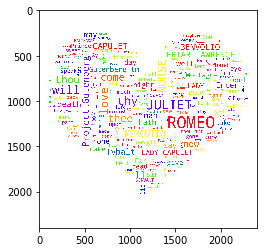

In [57]:
plt.imshow(wordcloud)

In [58]:
# READABILITY ASSESMENT WITH TEXTATISTIC
text = Path('RomeoAndJuliet.txt').read_text()

In [59]:
from textatistic import Textatistic
readability = Textatistic(text)
%precision 3

'%.3f'

In [60]:
 readability.dict()

{'char_count': 131782,
 'word_count': 29319,
 'sent_count': 3403,
 'sybl_count': 34818,
 'notdalechall_count': 6923,
 'polysyblword_count': 884,
 'flesch_score': 97.623,
 'fleschkincaid_score': 1.783,
 'gunningfog_score': 4.652,
 'smog_score': 6.041,
 'dalechall_score': 7.792}

In [63]:
#NAMED ENTITY RECOGNITION WITH SPACY

import spacy
nlp = spacy.load("en_core_web_sm")

In [64]:
document = nlp('In 1994, Tim Berners-Lee founded ' + 
              'World Wide Web Consortium (WC3), devoted to '+
              'developing web technologies')

In [67]:
# getting the name entities
for entity in document.ents:
    print(f'{entity.text}: {entity.label_}')

1994: DATE
Tim Berners-Lee: PERSON
World Wide Web Consortium: ORG


In [68]:
#SIMILARITY DETECTION WITH SPACY
nlp = spacy.load("en_core_web_sm")

In [69]:
document1 = nlp(Path("RomeoAndJuliet.txt").read_text())
document2 = nlp(Path("EdwardTheSecond.txt").read_text())

In [70]:
# comparing similarity
document1.similarity(document2)

/home/edgar/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.951436952932914